In [174]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
stitcheddf = pd.read_csv('../datafiles/data_rerun.csv')

In [175]:
startdates = [datetime(1996, 4, 1), datetime(2000, 1, 1),
              datetime(2004, 4, 1), datetime(2009, 5, 1),
              datetime(2012, 3, 1), datetime(2014, 10, 1),
              datetime(2017, 4, 1)]
enddates = [datetime(1997, 12, 1), datetime(2002, 5, 1),
            datetime(2007, 1, 1), datetime(2010, 10, 1),
            datetime(2013, 6, 1), datetime(2016, 2, 1),
            datetime(2019, 1, 1)]

In [176]:
dfsorted = stitcheddf.sort_values(by=['wavelength','date'])
dfsorted[dfsorted['wavelength'] == '2.16']
dfsorted['peakFftPower'] = [float(s.replace('[', '').replace(']', '').split(' ')[0]) for s in dfsorted['fftDetrendedWavepower'].tolist()]
df = pd.read_csv('../datafiles/foldeddata.csv')

In [231]:
obs216 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.16'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs216['filename'] = filenames
obs216['date'] = dates
obs216['lonstart'] = lonstarts
obs216['lonend'] = lonends
obs216['fftpeak'] = fftpeaks
obs216 = obs216.sort_values(by='date')
obs216

,filename,date,lonstart,lonend,fftpeak
0,07-may-1_2.16.png.png,2007-05-01,0,72,0.028664
1,09-aug-1_2.16.png.png,2009-08-01,0,720,0.217654
2,09-aug-13_2.16.png.png,2009-08-13,0,648,0.063800
3,09-aug-23_2.16.png.png,2009-08-23,0,576,0.055132
4,09-sep-27_2.16.png.png,2009-09-27,72,360,0.066957
5,12-oct-28_2.16.png.png,2012-10-28,72,576,0.189660
6,13-mar-2_2.16.png.png,2013-03-02,0,576,0.174605
10,15-nov-6_2.16.png.png,2015-11-06,288,720,0.040099
8,15-nov-21_2.16.png.png,2015-11-21,216,360,0.006319
9,15-nov-28_2.16.png.png,2015-11-28,216,288,0.006479


In [406]:
df = pd.read_csv('../datafiles/foldeddata.csv')

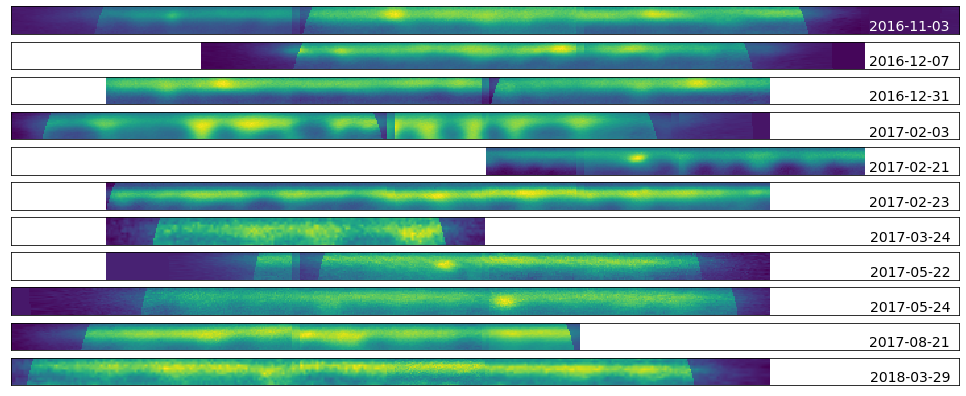

In [97]:
# drop = [0,1,2,3,4,5,6,7,8,9,10,13, 18,19]
drop = [0, 1, 2, 7, 8, 9, 13, 18, 19]
flip = [10, 11, 12, 13, 14, 15, 16, 17]
fig = plt.figure(figsize=(17, 7))
order = [0, 11, 7, 8, 9, 10, 6, 2, 1, 3, 4, 5]
rows=11
columns=1
g = 0
dates = ['a','2018-03-29', '2017-03-24', '2017-05-22', '2017-05-24', '2017-08-21', '2017-02-23',
         '2016-12-07', '2016-11-03', '2016-12-31', '2017-02-03', '2017-02-21']
for i, row in obs216.iterrows():
    if i not in drop:
        g += 1
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        ax = fig.add_subplot(rows, columns, order[g])
        ax.imshow(neb)
        plt.xticks([])
        plt.yticks([])
        if g == 8:
            tcolor = 'white'
        else:
            tcolor = 'black'
        if i in flip:
            plt.gca().invert_xaxis()
            ax.text(7, 20, dates[g], horizontalalignment='right', verticalalignment='bottom', color=tcolor, fontsize=14)
        else:
            ax.text(713, 20, dates[g], horizontalalignment='right', verticalalignment='bottom', color=tcolor, fontsize=14)

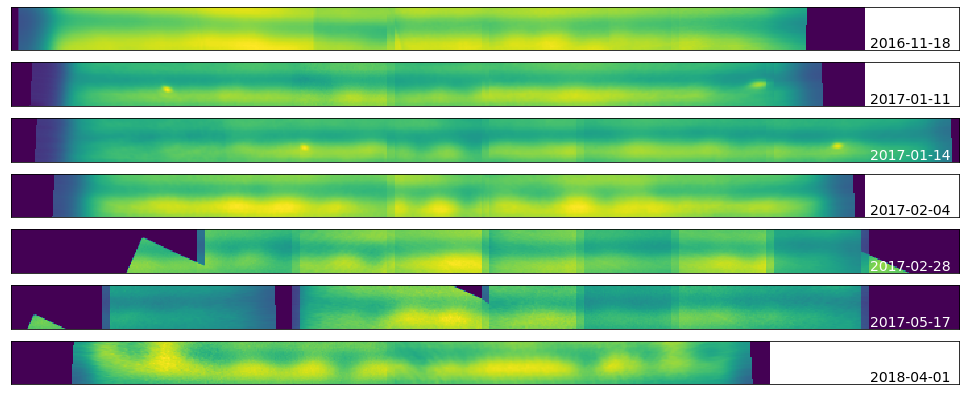

In [124]:
import os
fig = plt.figure(figsize=(17, 7))
drop = [1]
rows=7
columns=1
i = 0
g = 0
dates = ['a', '2016-11-18', '2017-01-11', '2017-01-14', '2017-02-04', '2017-02-28', '2017-05-17', '2018-04-01']
for file in os.listdir('../imgs/midir/2017'):
    i += 1
    if i not in drop:
        g += 1
        img = plt.imread('../imgs/midir/2017/'+file)
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, :img.shape[1], :] = img        
        ax = fig.add_subplot(rows, columns, g)
        ax.imshow(neb)
        
        if g in [3, 5, 6]:
            tcolor='white'
        else:
            tcolor='black'
        ax.text(713, 33, dates[g], horizontalalignment='right', verticalalignment='bottom', color=tcolor, fontsize=14)
        plt.xticks([])
        plt.yticks([])

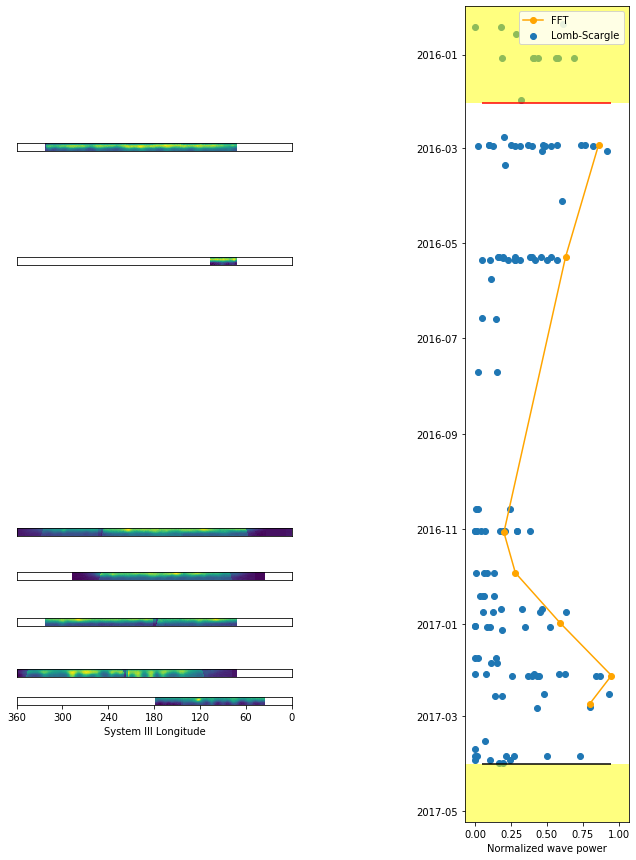

In [266]:
drop = [0,1,2,3,4,5,6,7,8,9,10,18,19]
fig = plt.figure(figsize=(17, 15))
ylocs = [167, 307, 694, 639, 750, 812, 847]
minday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[0], '%Y-%m-%d'))) // 86400
maxday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[-1], '%Y-%m-%d'))) // 86400
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in obs216.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        plt.gca().invert_xaxis()
        g += 1
    c += 1
plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
plt.xlabel("System III Longitude")
wavepowers = fig.add_subplot(grid[:, -1])

plt.ylim(datetime.strptime('2015-12-01', '%Y-%m-%d'), datetime.strptime('2017-05-08', '%Y-%m-%d'))
plt.axhspan(datetime.strptime('2015-01-01', '%Y-%m-%d'), enddates[5], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[6], datetime.strptime('2018-01-01', '%Y-%m-%d'), facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
# wavepowers.plot(np.array(obs216['fftpeak'])[-9:-2]/np.max(dfsorted['peakFftPower']), obs216['date'].tolist()[-9:-2])
# wavepowers.plot([.86,.63,.23,.28,.54,.93,.77], obs216['date'].tolist()[-9:-2], color='orange')
fftdates = [datetime.strptime('2016-02-28', '%Y-%m-%d'),
 datetime.strptime('2016-05-10', '%Y-%m-%d'),
 datetime.strptime('2016-11-03', '%Y-%m-%d'),
 datetime.strptime('2016-11-29', '%Y-%m-%d'),
 datetime.strptime('2016-12-31', '%Y-%m-%d'),
 datetime.strptime('2017-02-03', '%Y-%m-%d'),
 datetime.strptime('2017-02-21', '%Y-%m-%d')]
wavepowers.plot([.86,.63,.2,.28,.59,.95,.8], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[6:], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[5:-1], xmin=0.05, xmax=0.95, color='red')
plt.gca().invert_yaxis()

plt.legend(loc='upper right')
plt.xlabel("Normalized wave power")
# plt.savefig('graphs/progression/2.16_16-17.png', bbox_inches='tight')
plt.show()

In [179]:
obs212 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.12'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs212['filename'] = filenames
obs212['date'] = dates
obs212['lonstart'] = lonstarts
obs212['lonend'] = lonends
obs212['fftpeak'] = fftpeaks
obs212 = obs212.sort_values(by='date')

Text(0.5, 0, 'Normalized wave power')

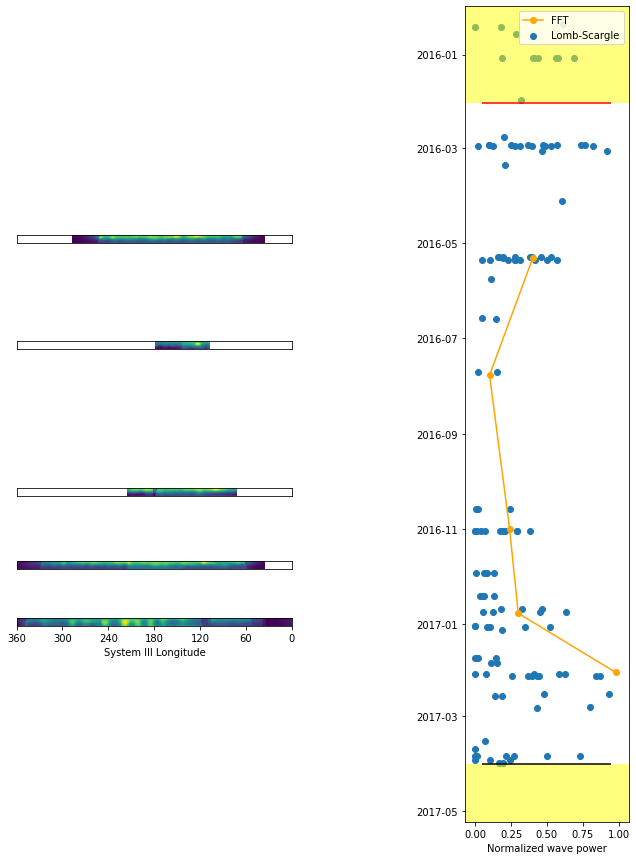

In [308]:
drop = []
fig = plt.figure(figsize=(17, 15))
ylocs = [280, 680, 590, 750, 410]
minday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[0], '%Y-%m-%d'))) // 86400
maxday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[-1], '%Y-%m-%d'))) // 86400
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in obs212.tail(7).head(5).iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
#         yloc = currday - minday
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        plt.gca().invert_xaxis()
        if g == 4:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1
wavepowers = fig.add_subplot(grid[:, -1])

plt.ylim(datetime.strptime('2015-12-01', '%Y-%m-%d'), datetime.strptime('2017-05-08', '%Y-%m-%d'))
plt.axhspan(datetime.strptime('2015-01-01', '%Y-%m-%d'), enddates[5], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[6], datetime.strptime('2018-01-01', '%Y-%m-%d'), facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
# wavepowers.plot(np.array(obs216['fftpeak'])[-9:-2]/np.max(dfsorted['peakFftPower']), obs216['date'].tolist()[-9:-2])
fftdates = [datetime.strptime('2016-05-11', '%Y-%m-%d'),
 datetime.strptime('2016-07-25', '%Y-%m-%d'),
 datetime.strptime('2016-11-01', '%Y-%m-%d'),
 datetime.strptime('2016-12-25', '%Y-%m-%d'),
 datetime.strptime('2017-02-01', '%Y-%m-%d'),]
wavepowers.plot([.4,.1,.24,.3,.98], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[6:], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[5:-1], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
# plt.savefig('graphs/progression/2.12_16-17.png', bbox_inches='tight')

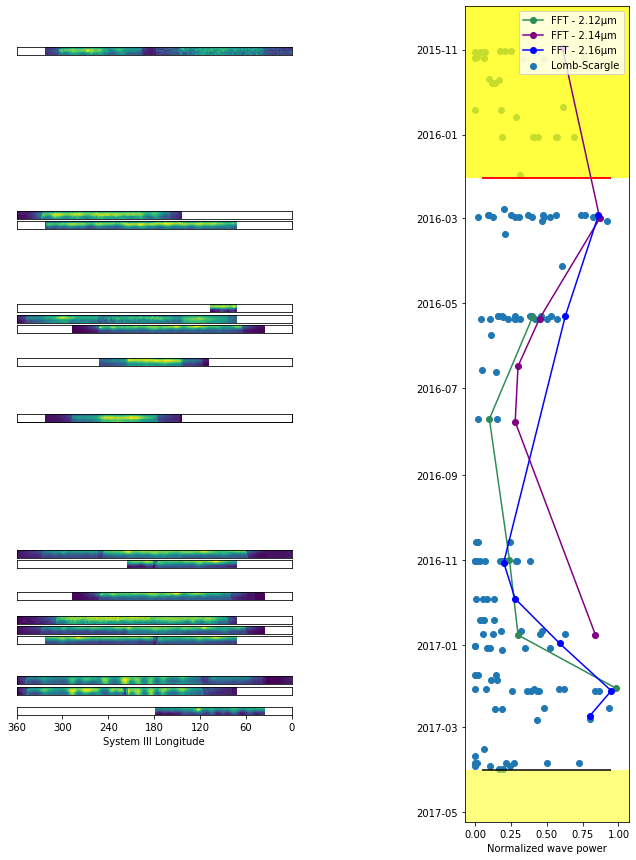

In [345]:
fig = plt.figure(figsize=(17, 15))
grid = plt.GridSpec(1000, 5)

drop = [0,1,2,3,4,5,6,7,8,9,10,18,19]
ylocs = [263, 365, 718, 666, 772, 835, 859]
minday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[0], '%Y-%m-%d'))) // 86400
maxday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[-1], '%Y-%m-%d'))) // 86400
c = 0
g = 0
for i, row in obs216.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        plt.gca().invert_xaxis()
        if g == 6:
            plt.xticks(np.arange(720, -1, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1

drop = []
ylocs = [391, 760, 679, 821, 500]
minday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[0], '%Y-%m-%d'))) // 86400
maxday = int(datetime.timestamp(datetime.strptime(df['absdate'].tolist()[-1], '%Y-%m-%d'))) // 86400
c = 0
g = 0
for i, row in obs212.tail(7).head(5).iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        plt.gca().invert_xaxis()
    c += 1

drop = [3]
invert = [0, 1, 2]
ylocs = [50, 251, 500, 378, 431, 748]
graphdf = obs212.head(14).tail(7)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
    c += 1

wavepowers = fig.add_subplot(grid[:, -1])
plt.ylim(datetime.strptime('2015-10-01', '%Y-%m-%d'), datetime.strptime('2017-05-08', '%Y-%m-%d'))
plt.axhspan(datetime.strptime('2015-01-01', '%Y-%m-%d'), enddates[5], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[6], datetime.strptime('2018-01-01', '%Y-%m-%d'), facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[5], enddates[5], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
wavepowers.hlines(startdates[6:], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[5:-1], xmin=0.05, xmax=0.95, color='red')

fftdates = [datetime.strptime('2016-05-11', '%Y-%m-%d'),
 datetime.strptime('2016-07-23', '%Y-%m-%d'),
 datetime.strptime('2016-11-01', '%Y-%m-%d'),
 datetime.strptime('2016-12-25', '%Y-%m-%d'),
 datetime.strptime('2017-02-01', '%Y-%m-%d'),]
fft2 = wavepowers.plot([.4,.1,.24,.3,.98], fftdates, color='seagreen', marker='o', label='FFT - 2.12µm')

fftdates = [datetime.strptime('2015-10-31', '%Y-%m-%d'),
 datetime.strptime('2016-03-01', '%Y-%m-%d'),
 datetime.strptime('2016-05-12', '%Y-%m-%d'),
 datetime.strptime('2016-06-15', '%Y-%m-%d'),
 datetime.strptime('2016-07-25', '%Y-%m-%d'),
 datetime.strptime('2016-12-25', '%Y-%m-%d')]
wavepowers.plot([.61,.87, .45, .3, .28, 0.84], fftdates, color='purple', marker='o', label='FFT - 2.14µm')
wavepowers.hlines(startdates[5], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[5], xmin=0.05, xmax=0.95, color='red')

fftdates = [datetime.strptime('2016-02-28', '%Y-%m-%d'),
 datetime.strptime('2016-05-10', '%Y-%m-%d'),
 datetime.strptime('2016-11-03', '%Y-%m-%d'),
 datetime.strptime('2016-11-29', '%Y-%m-%d'),
 datetime.strptime('2016-12-31', '%Y-%m-%d'),
 datetime.strptime('2017-02-03', '%Y-%m-%d'),
 datetime.strptime('2017-02-21', '%Y-%m-%d')]
fft1 = wavepowers.plot([.86,.63,.2,.28,.59,.95,.8], fftdates, color='blue', marker='o', label='FFT - 2.16µm')

plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.legend(loc='upper right')
plt.savefig('graphs/progression/2.12_2.14_2.16_16-17.png', bbox_inches='tight')

In [181]:
midirdf = pd.read_csv('../datafiles/ls_midir.csv')
midirpower = [float(power) for power in midirdf['normedpeakwavepower'].tolist()]
midirdate = [datetime.strptime(date.zfill(9), '%y-%b-%d') for date in midirdf['date'].tolist()]

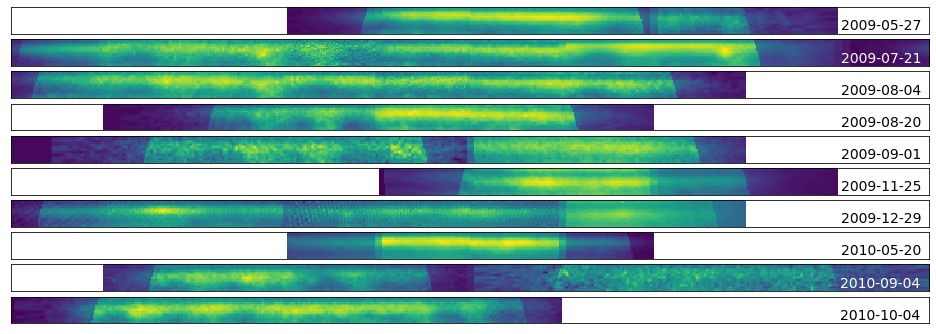

In [157]:
drop = [1, 10]
flip = [6, 7]
fig = plt.figure(figsize=(17, 7))
ylocs = [57, 122, 137, 152, 169, 605, 636, 272, 309, 475]
order = [0, 1, 2, 3, 4, 5, 9, 10, 6, 7, 8]
rows = graphdf.shape[0]
columns=1
g = 0
dates = ['a', '2009-05-27', '2009-07-21', '2009-08-04', '2009-08-20', '2009-09-01',
 '2010-09-04', '2010-10-04', '2009-11-25', '2009-12-29', '2010-05-20',]
for i, row in graphdf.iterrows():
    if i not in drop:
        g += 1
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        ax = fig.add_subplot(rows, columns, order[g])
        ax.imshow(neb)
        plt.xticks([])
        plt.yticks([])
        if g in [2,6]:
            tcolor = 'white'
        else:
            tcolor = 'black'
        if g in flip:
            plt.gca().invert_xaxis()
            ax.text(7, 20, dates[g], horizontalalignment='right', verticalalignment='bottom', color=tcolor, fontsize=14)
        else:
            ax.text(713, 20, dates[g], horizontalalignment='right', verticalalignment='bottom', color=tcolor, fontsize=14)

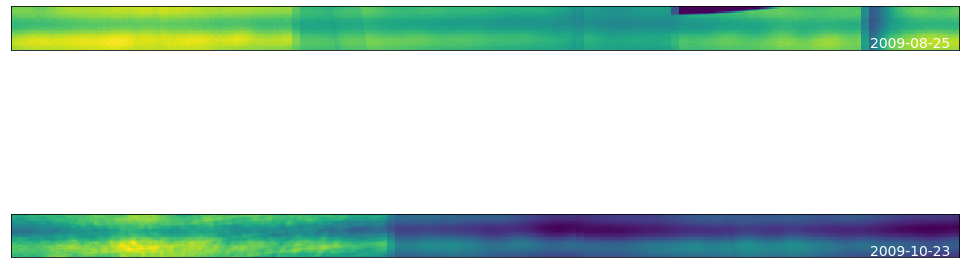

In [169]:
import os
fig = plt.figure(figsize=(17, 7))
drop = []
# rows=graphdf.shape[0]
rows = 2
columns=1
i = 0
g = 0
dates = ['a', '2009-08-25','2009-10-23']
for file in ['../imgs/midir/08Jun24_17.65.png', '../imgs/midir/08Sep13_17.65.png']:
    i += 1
    if i not in drop:
        g += 1
        img = plt.imread(file)
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, :img.shape[1], :] = img        
        ax = fig.add_subplot(rows, columns, g)
        ax.imshow(neb)
        ax.text(713, 33, dates[g], horizontalalignment='right', verticalalignment='bottom', color='white', fontsize=14)
        plt.xticks([])
        plt.yticks([])

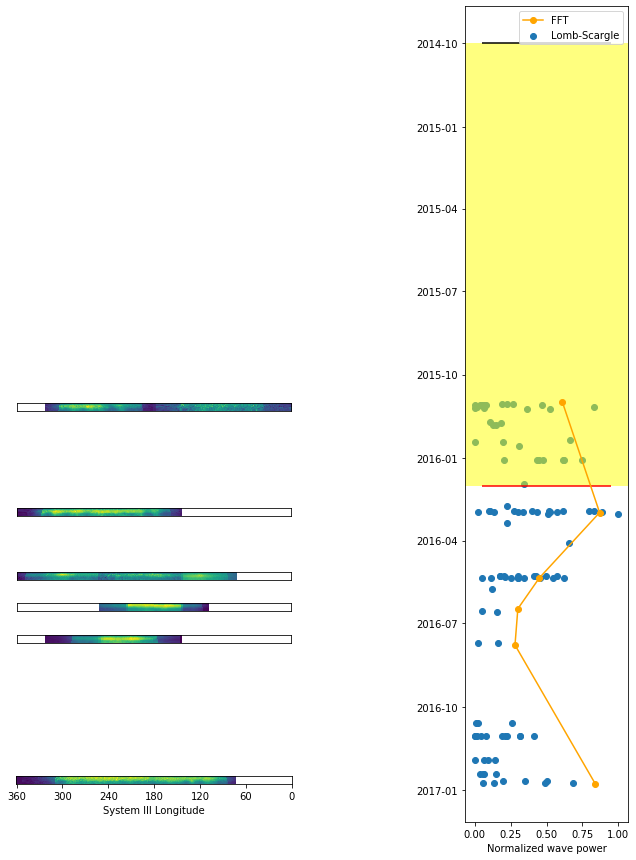

In [390]:
drop = [3]
invert = [0, 1, 2]
fig = plt.figure(figsize=(17, 15))
ylocs = [486, 615, 771, 693, 732, 944]
graphdf = obs212.head(14).tail(7)
df = pd.read_csv('../datafiles/foldeddata.csv')
df = df[(df.absdate > '2015') & (df.absdate < '2017')]
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 6:
            plt.xticks(np.arange(0, 721, 720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

# plt.ylim(datetime.strptime('2009-04-01', '%Y-%m-%d'), datetime.strptime('2011-01-20', '%Y-%m-%d'))
plt.axhspan(startdates[5], enddates[5], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('2015-10-31', '%Y-%m-%d'),
 datetime.strptime('2016-03-01', '%Y-%m-%d'),
 datetime.strptime('2016-05-12', '%Y-%m-%d'),
 datetime.strptime('2016-06-15', '%Y-%m-%d'),
 datetime.strptime('2016-07-25', '%Y-%m-%d'),
 datetime.strptime('2016-12-25', '%Y-%m-%d')]
wavepowers.plot([.61,.87, .45, .3, .28, 0.84], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[5], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[5], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.16_15-16.png', bbox_inches='tight')

In [394]:
obs223 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.23'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs223['filename'] = filenames
obs223['date'] = dates
obs223['lonstart'] = lonstarts
obs223['lonend'] = lonends
obs223['fftpeak'] = fftpeaks
obs223 = obs223.sort_values(by='date')
obs223

,filename,date,lonstart,lonend,fftpeak
2,09-aug-4_2.23.png.png,2009-08-04,216,576,0.191951
0,09-aug-23_2.23.png.png,2009-08-23,0,504,0.094866
1,09-aug-26_2.23.png.png,2009-08-26,72,720,0.119786
5,09-sep-12_2.23.png.png,2009-09-12,72,576,0.088700
6,09-sep-27_2.23.png.png,2009-09-27,360,648,0.097877
7,09-sep-30_2.23.png.png,2009-09-30,0,288,0.059121
4,09-nov-22_2.23.png.png,2009-11-22,0,720,0.084588
3,09-dec-4_2.23.png.png,2009-12-04,216,576,0.151687


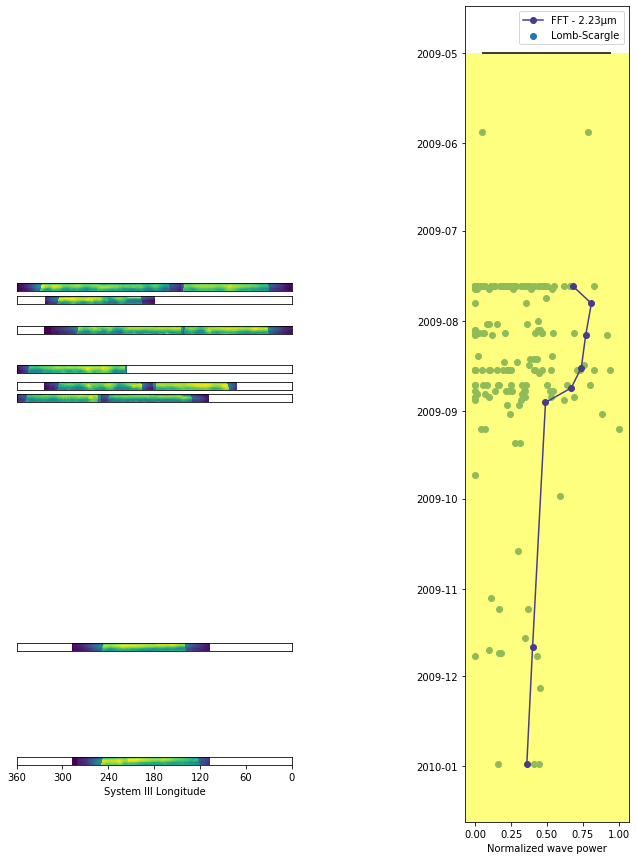

In [397]:
drop = []
invert = [0, 4, 6, 7]
fig = plt.figure(figsize=(17, 15))
ylocs = [780, 475, 392, 460, 355, 440, 339, 920]
graphdf = obs223
df = pd.read_csv('../datafiles/foldeddata.csv')
df = df[(df.absdate > '2009') & (df.absdate < '2010')]
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 8:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('2009-04-15', '%Y-%m-%d'), datetime.strptime('2010-01-20', '%Y-%m-%d'))
plt.axhspan(startdates[3], enddates[3], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('2009-07-20', '%Y-%m-%d'),
 datetime.strptime('2009-07-26', '%Y-%m-%d'),
 datetime.strptime('2009-08-06', '%Y-%m-%d'),
 datetime.strptime('2009-08-17', '%Y-%m-%d'),
 datetime.strptime('2009-08-24', '%Y-%m-%d'),
 datetime.strptime('2009-08-29', '%Y-%m-%d'),
 datetime.strptime('2009-11-21', '%Y-%m-%d'),
 datetime.strptime('2009-12-31', '%Y-%m-%d')]
wavepowers.plot([.68,.81, .77, .74, .67, .49, .4, .36], fftdates, color='darkslateblue', marker='o', label='FFT - 2.23μm')
wavepowers.hlines(startdates[3], xmin=0.05, xmax=0.95)
# wavepowers.hlines(enddates[4], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.23_09.png', bbox_inches='tight')

Text(0.5, 0, 'Normalized wave power')

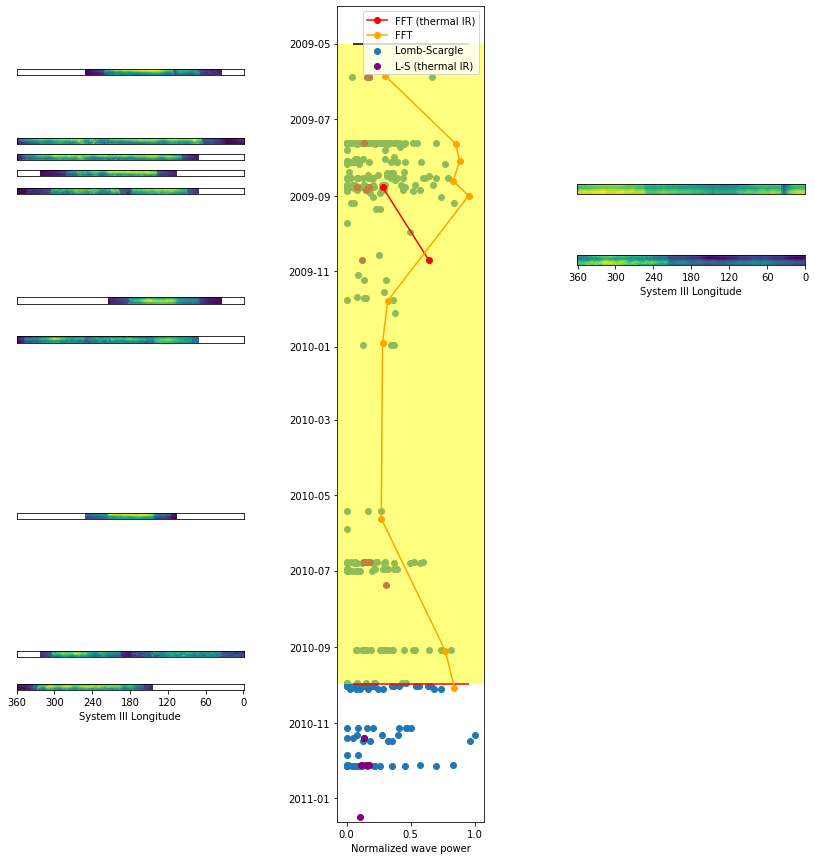

In [182]:
drop = [0, 9]
invert = [6, 7]
fig = plt.figure(figsize=(17, 15))
ylocs = [57, 122, 137, 152, 169, 605, 636, 272, 309, 475]
graphdf = obs212.head(13).tail(12)
df = pd.read_csv('../datafiles/foldeddata.csv')
df = df[(df.absdate > '2009') & (df.absdate < '2011')]
minday = int(datetime.timestamp(graphdf['date'].tolist()[0])) // 86400
maxday = int(datetime.timestamp(graphdf['date'].tolist()[-1])) // 86400
grid = plt.GridSpec(maxday-minday + 10, 12)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
#         yloc = currday - minday
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:4])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 7:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1
    
#mid ir
midirfiles = ['../imgs/midir/08Jun24_17.65.png', '../imgs/midir/08Sep13_17.65.png']
midirylocs = [167, 234]
for idx in range(len(midirfiles)):
    img = plt.imread(midirfiles[idx])
    ax = fig.add_subplot(grid[midirylocs[idx]:midirylocs[idx]+10, 7:])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(img, cmap='gist_heat')
plt.xticks(np.arange(0, 721, 720/6), np.arange(360, -1, -60))
plt.xlabel("System III Longitude")

#scatter plot
wavepowers = fig.add_subplot(grid[:, 5:7])
plt.ylim(datetime.strptime('2009-04-01', '%Y-%m-%d'), datetime.strptime('2011-01-20', '%Y-%m-%d'))
plt.axhspan(startdates[3], enddates[3], facecolor='yellow', alpha=0.5)
wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')

wavepowers.scatter(midirpower[20:], midirdate[20:], label='L-S (thermal IR)', color='purple')

fftdates = [datetime.strptime('2009-05-27', '%Y-%m-%d'),
 datetime.strptime('2009-07-21', '%Y-%m-%d'),
 datetime.strptime('2009-08-04', '%Y-%m-%d'),
 datetime.strptime('2009-08-20', '%Y-%m-%d'),
 datetime.strptime('2009-09-01', '%Y-%m-%d'),
 datetime.strptime('2009-11-25', '%Y-%m-%d'),
 datetime.strptime('2009-12-29', '%Y-%m-%d'),
 datetime.strptime('2010-05-20', '%Y-%m-%d'),
 datetime.strptime('2010-09-04', '%Y-%m-%d'),
 datetime.strptime('2010-10-04', '%Y-%m-%d')]

midir_fftdates = [datetime.strptime('2009-08-25', '%Y-%m-%d'),
 datetime.strptime('2009-10-23', '%Y-%m-%d')]
wavepowers.plot([.28, .64], midir_fftdates, label='FFT (thermal IR)', color='red', marker='o')

wavepowers.plot([.3,.85,.88,.83,.95, 0.32, 0.28, 0.27, 0.77, 0.84], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[3], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
# plt.savefig('graphs/progression/2.12_09-11.png', bbox_inches='tight')

Text(0.5, 0, 'Normalized wave power')

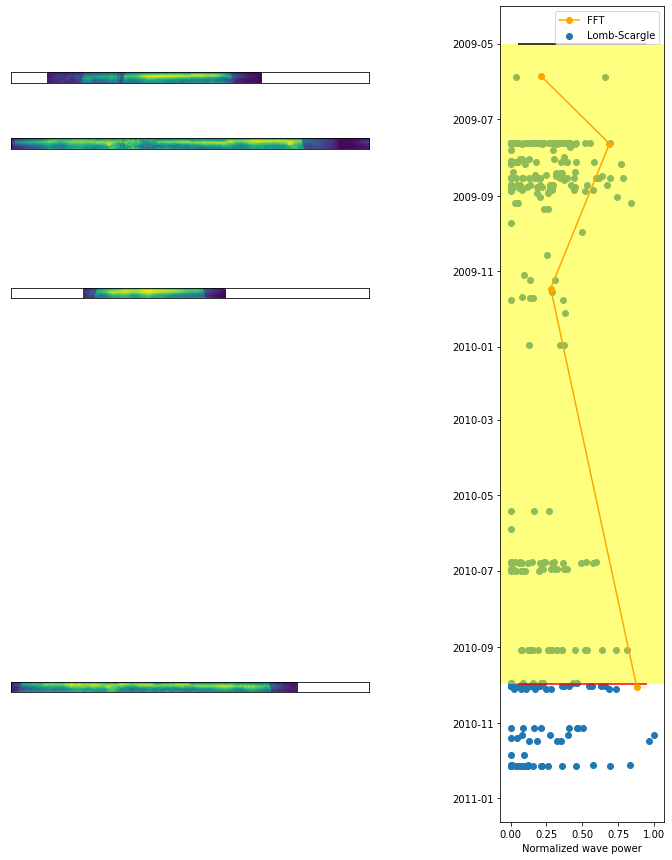

In [183]:
drop = []
invert = [0, 1]
fig = plt.figure(figsize=(17, 15))
ylocs = [265, 62, 124, 636]
graphdf = obs212.head(5).tail(4)
# df = pd.read_csv('../datafiles/foldeddata.csv')
# df = df[(df.absdate > '2009') & (df.absdate < '2011')]
# minday = int(datetime.timestamp(graphdf['date'].tolist()[0])) // 86400
# maxday = int(datetime.timestamp(graphdf['date'].tolist()[-1])) // 86400
grid = plt.GridSpec(maxday-minday + 10, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
#         yloc = currday - minday
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 7:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('2009-04-01', '%Y-%m-%d'), datetime.strptime('2011-01-20', '%Y-%m-%d'))
plt.axhspan(startdates[3], enddates[3], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('2009-05-27', '%Y-%m-%d'),
 datetime.strptime('2009-07-21', '%Y-%m-%d'),
 datetime.strptime('2009-11-15', '%Y-%m-%d'),
 datetime.strptime('2010-10-03', '%Y-%m-%d')]
wavepowers.plot([.21,.69,.28, 0.88], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[3], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
# plt.savefig('graphs/progression/2.16_09-11.png', bbox_inches='tight')

In [346]:
obs217 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.17'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs217['filename'] = filenames
obs217['date'] = dates
obs217['lonstart'] = lonstarts
obs217['lonend'] = lonends
obs217['fftpeak'] = fftpeaks
obs217 = obs217.sort_values(by='date')

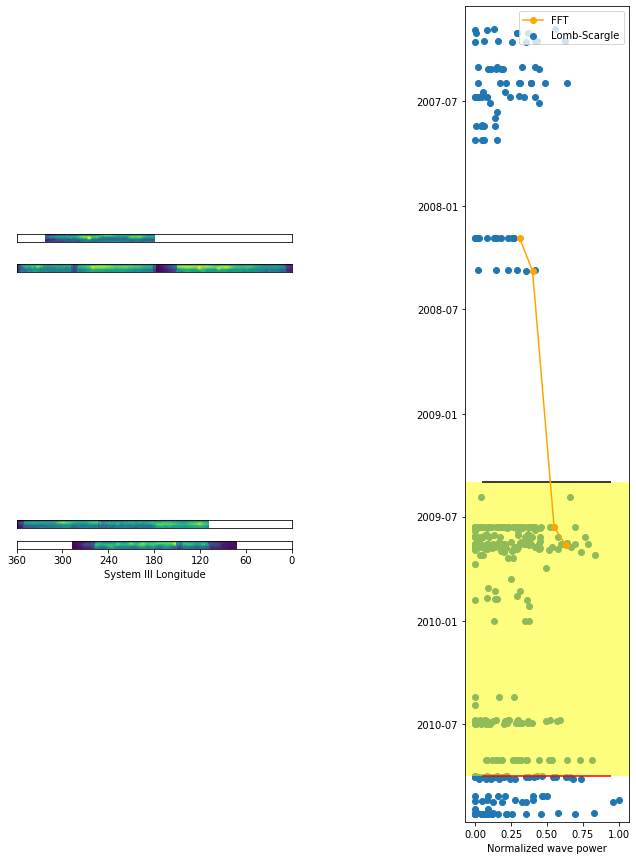

In [542]:
drop = []
invert = [0, 1]
fig = plt.figure(figsize=(17, 15))
ylocs = [655, 279, 316, 630]
graphdf = obs217
df = pd.read_csv('../datafiles/foldeddata.csv')
df = df[(df.absdate > '2007') & (df.absdate < '2011')]
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 0:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('2007-01-15', '%Y-%m-%d'), datetime.strptime('2010-12-20', '%Y-%m-%d'))
plt.axhspan(startdates[3], enddates[3], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('2008-02-27', '%Y-%m-%d'),
 datetime.strptime('2008-04-25', '%Y-%m-%d'),
 datetime.strptime('2009-07-19', '%Y-%m-%d'),
 datetime.strptime('2009-08-20', '%Y-%m-%d')]
wavepowers.plot([.31,.4, .55, .63], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[2:4], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[2:4], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.17_07-10.png', bbox_inches='tight')

<Figure size 1224x1080 with 0 Axes>

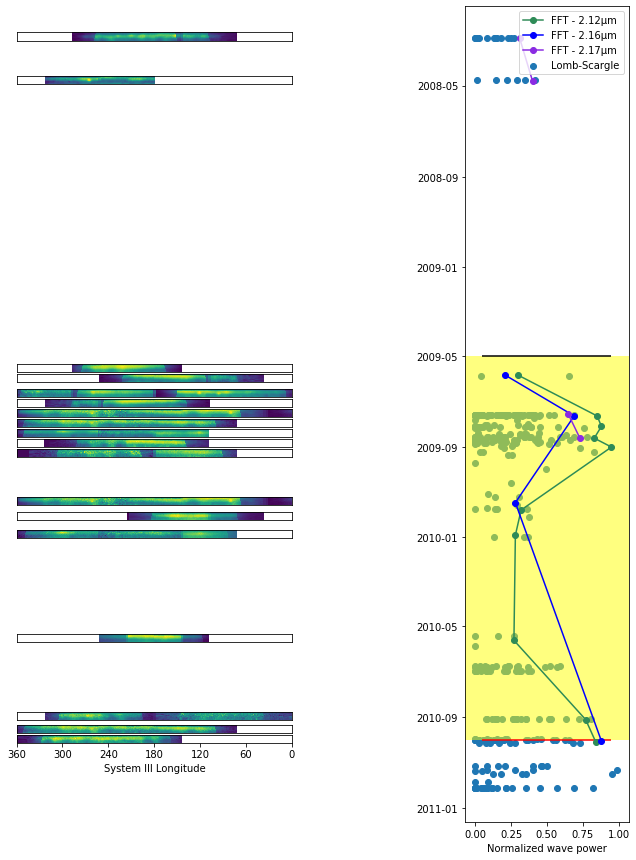

In [407]:
fig = plt.figure(figsize=(17, 15))
grid = plt.GridSpec(1000, 5)

drop = [0, 9]
invert = [6, 7]
fig = plt.figure(figsize=(17, 15))
ylocs = [451, 494, 506, 530, 543, 865, 893, 620, 642, 769]
c = 0
g = 0
graphdf = obs212.head(13).tail(12)
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:4])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 7:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1
    
drop = []
invert = [0, 1]
ylocs = [439, 481, 602, 881]
graphdf = obs212.head(5).tail(4)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        g += 1
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 7:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
    c += 1

drop = []
invert = [0, 1]
ylocs = [32, 85, 469, 518]
graphdf = obs217
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        g += 1
    c += 1
    
wavepowers = fig.add_subplot(grid[:, -1:])    
plt.ylim(datetime.strptime('2008-01-15', '%Y-%m-%d'), datetime.strptime('2011-01-20', '%Y-%m-%d'))
plt.axhspan(startdates[3], enddates[3], facecolor='yellow', alpha=0.5)
wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')

fftdates = [datetime.strptime('2009-05-27', '%Y-%m-%d'),
 datetime.strptime('2009-07-21', '%Y-%m-%d'),
 datetime.strptime('2009-08-04', '%Y-%m-%d'),
 datetime.strptime('2009-08-20', '%Y-%m-%d'),
 datetime.strptime('2009-09-01', '%Y-%m-%d'),
 datetime.strptime('2009-11-25', '%Y-%m-%d'),
 datetime.strptime('2009-12-29', '%Y-%m-%d'),
 datetime.strptime('2010-05-20', '%Y-%m-%d'),
 datetime.strptime('2010-09-04', '%Y-%m-%d'),
 datetime.strptime('2010-10-04', '%Y-%m-%d')]
wavepowers.plot([.3,.85,.88,.83,.95, 0.32, 0.28, 0.27, 0.77, 0.84], fftdates, color='seagreen', marker='o', label='FFT - 2.12μm')

fftdates = [datetime.strptime('2009-05-27', '%Y-%m-%d'),
 datetime.strptime('2009-07-21', '%Y-%m-%d'),
 datetime.strptime('2009-11-15', '%Y-%m-%d'),
 datetime.strptime('2010-10-03', '%Y-%m-%d')]
wavepowers.plot([.21,.69,.28, 0.88], fftdates, color='blue', marker='o', label='FFT - 2.16μm')

fftdates = [datetime.strptime('2008-02-27', '%Y-%m-%d'),
 datetime.strptime('2008-04-25', '%Y-%m-%d')]
wavepowers.plot([.31,.4], fftdates, color='blueviolet', marker='o')
fftdates = [datetime.strptime('2009-07-19', '%Y-%m-%d'),
 datetime.strptime('2009-08-20', '%Y-%m-%d')]
wavepowers.plot([.65, .73], fftdates, color='blueviolet', marker='o', label='FFT - 2.17μm')

wavepowers.hlines(startdates[2:4], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[2:4], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.12_2.16_2.17_08-10.png', bbox_inches='tight')

In [184]:
obs214 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.14'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs214['filename'] = filenames
obs214['date'] = dates
obs214['lonstart'] = lonstarts
obs214['lonend'] = lonends
obs214['fftpeak'] = fftpeaks
obs214 = obs214.sort_values(by='date')
obs214

,filename,date,lonstart,lonend,fftpeak
0,96-jun-26_2.14.png.png,1996-06-26,144,648,0.176556
1,97-oct-1_2.14.png.png,1997-10-01,216,720,0.054496
2,99-jun-29_2.14.png.png,1999-06-29,216,720,0.080979
4,99-oct-7_2.14.png.png,1999-10-07,0,648,0.037883
3,99-nov-25_2.14.png.png,1999-11-25,0,720,0.032557


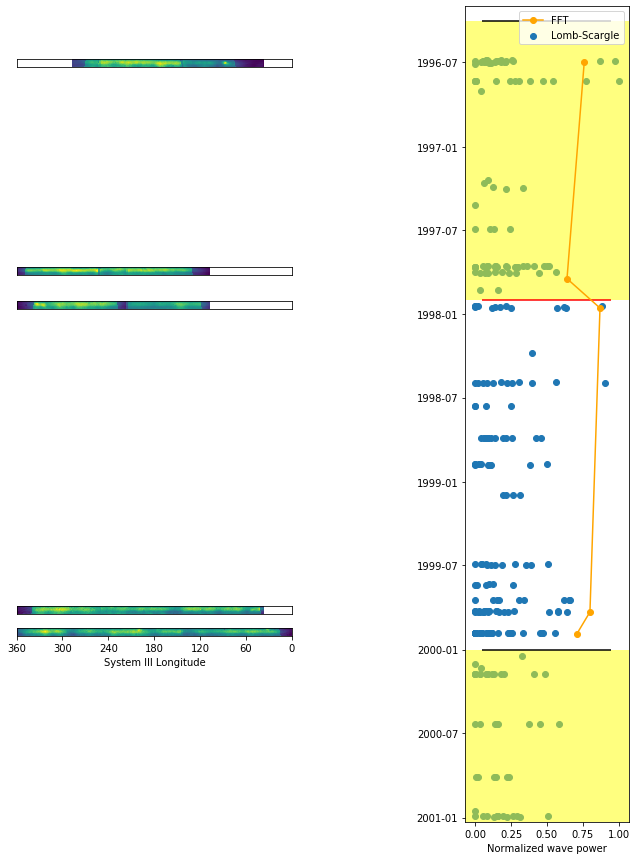

In [573]:
drop = []
invert = [1, 2, 4]
fig = plt.figure(figsize=(17, 15))
ylocs = [65, 320, 361, 735, 762]
graphdf = obs214
df = pd.read_csv('../datafiles/foldeddata.csv')
df = df[(df.absdate > '1996') & (df.absdate < '2001')]
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 4:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1996-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-10-15', '%Y-%m-%d'),
 datetime.strptime('1997-12-18', '%Y-%m-%d'),
 datetime.strptime('1999-10-11', '%Y-%m-%d'),
 datetime.strptime('1999-11-27', '%Y-%m-%d')]
wavepowers.plot([.76,.64, .87, .8, .71], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.14_96-99.png', bbox_inches='tight')

In [189]:
obs21 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.1'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs21['filename'] = filenames
obs21['date'] = dates
obs21['lonstart'] = lonstarts
obs21['lonend'] = lonends
obs21['fftpeak'] = fftpeaks
obs21 = obs21.sort_values(by='date')
obs21

,filename,date,lonstart,lonend,fftpeak
0,97-oct-1_2.1.png.png,1997-10-01,216,720,0.047336
1,99-jun-29_2.1.png.png,1999-06-29,216,720,0.072134
3,99-oct-7_2.1.png.png,1999-10-07,0,720,0.062569
2,99-nov-25_2.1.png.png,1999-11-25,0,648,0.053167


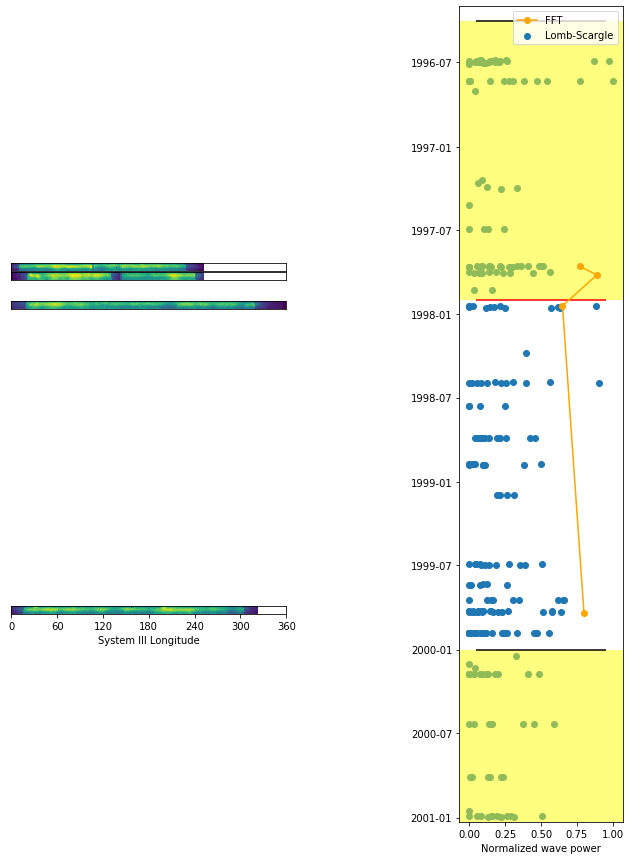

In [578]:
drop = []
invert = [0, 1]
fig = plt.figure(figsize=(17, 15))
ylocs = [315, 326, 361, 735]
graphdf = obs21
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 3:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1997-09-18', '%Y-%m-%d'),
 datetime.strptime('1997-10-07', '%Y-%m-%d'),
 datetime.strptime('1997-12-13', '%Y-%m-%d'),
 datetime.strptime('1999-10-14', '%Y-%m-%d')]
wavepowers.plot([.77,.89, .65, .8], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.1_97-99.png', bbox_inches='tight')

In [207]:
obs207 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.07'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs207['filename'] = filenames
obs207['date'] = dates
obs207['lonstart'] = lonstarts
obs207['lonend'] = lonends
obs207['fftpeak'] = fftpeaks
obs207 = obs207.sort_values(by='date')
obs207

,filename,date,lonstart,lonend,fftpeak
6,97-may-7_2.07.png.png,1997-05-07,72,576,0.049607
7,98-may-29_2.07.png.png,1998-05-29,144,648,0.024890
8,98-nov-23_2.07.png.png,1998-11-23,0,720,0.248431
9,99-jun-29_2.07.png.png,1999-06-29,216,720,0.070612
12,99-sep-13_2.07.png.png,1999-09-13,0,432,0.054925
11,99-oct-7_2.07.png.png,1999-10-07,0,648,0.038770
10,99-nov-25_2.07.png.png,1999-11-25,0,648,0.054694
1,00-oct-4_2.07.png.png,2000-10-04,144,576,0.052576
0,00-dec-29_2.07.png.png,2000-12-29,0,576,0.017995
2,07-may-29_2.07.png.png,2007-05-29,144,504,0.106096


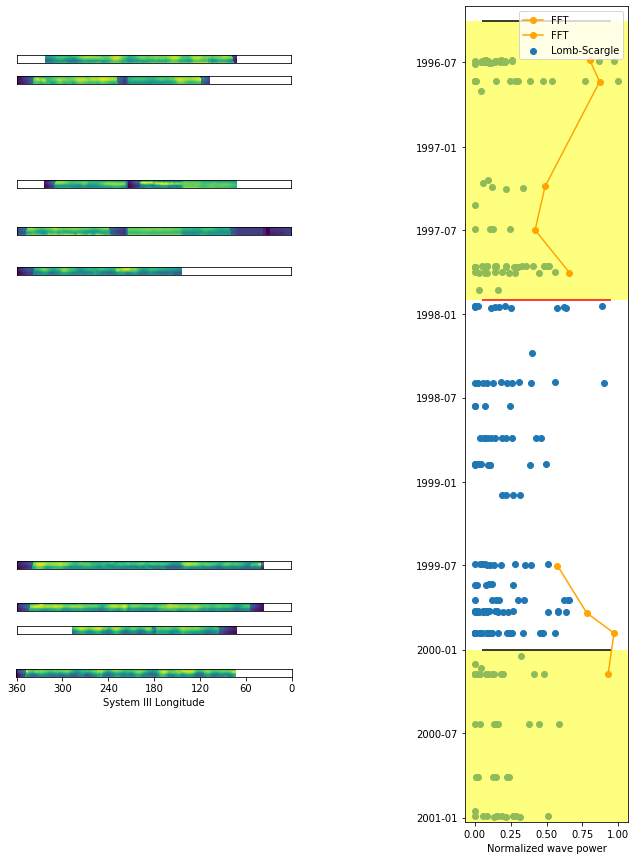

In [403]:
drop = []
invert = [1, 3]
fig = plt.figure(figsize=(17, 15))
ylocs = [213, 60, 271, 85, 320, 680, 731, 760, 812]
graphdf = obs207.head(9)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 8:
            plt.xticks(np.arange(0, 721, 720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1996-06-25', '%Y-%m-%d'),
 datetime.strptime('1996-08-12', '%Y-%m-%d'),
 datetime.strptime('1997-03-28', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-10-02', '%Y-%m-%d')]
wavepowers.plot([.8,.87, .49, .42, .66], fftdates, color='orange', marker='o', label='FFT')

fftdates = [datetime.strptime('1999-07-02', '%Y-%m-%d'),
 datetime.strptime('1999-10-13', '%Y-%m-%d'),
 datetime.strptime('1999-11-26', '%Y-%m-%d'),
 datetime.strptime('2000-02-22', '%Y-%m-%d')]
wavepowers.plot([.576, .78, .97, .93], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.07_97-00.png', bbox_inches='tight')

In [185]:
obs2 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.0'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs2['filename'] = filenames
obs2['date'] = dates
obs2['lonstart'] = lonstarts
obs2['lonend'] = lonends
obs2['fftpeak'] = fftpeaks
obs2 = obs2.sort_values(by='date')
obs2

,filename,date,lonstart,lonend,fftpeak
6,98-may-29_2.0.png.png,1998-05-29,144,648,0.035329
8,98-sep-26_2.0.png.png,1998-09-26,144,648,0.065780
7,98-nov-23_2.0.png.png,1998-11-23,216,648,0.051966
9,99-jun-29_2.0.png.png,1999-06-29,216,648,0.048631
12,99-sep-13_2.0.png.png,1999-09-13,0,432,0.050435
11,99-oct-7_2.0.png.png,1999-10-07,144,648,0.029495
10,99-nov-25_2.0.png.png,1999-11-25,144,648,0.047524
1,00-oct-4_2.0.png.png,2000-10-04,144,504,0.031286
0,00-dec-29_2.0.png.png,2000-12-29,216,576,0.020904
2,07-may-29_2.0.png.png,2007-05-29,216,504,0.032260


In [209]:
obs203 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.03'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs203['filename'] = filenames
obs203['date'] = dates
obs203['lonstart'] = lonstarts
obs203['lonend'] = lonends
obs203['fftpeak'] = fftpeaks
obs203 = obs203.sort_values(by='date')
obs203

,filename,date,lonstart,lonend,fftpeak
5,96-jun-26_2.03.png.png,1996-06-26,144,504,0.025647
6,98-may-29_2.03.png.png,1998-05-29,144,648,0.034315
7,98-nov-23_2.03.png.png,1998-11-23,0,576,0.028021
8,99-jun-29_2.03.png.png,1999-06-29,216,648,0.042799
11,99-sep-13_2.03.png.png,1999-09-13,0,432,0.047293
10,99-oct-7_2.03.png.png,1999-10-07,0,648,0.038165
9,99-nov-25_2.03.png.png,1999-11-25,0,648,0.046049
1,00-oct-4_2.03.png.png,2000-10-04,144,504,0.020094
0,00-dec-29_2.03.png.png,2000-12-29,216,576,0.018158
2,07-may-29_2.03.png.png,2007-05-29,216,504,0.031340


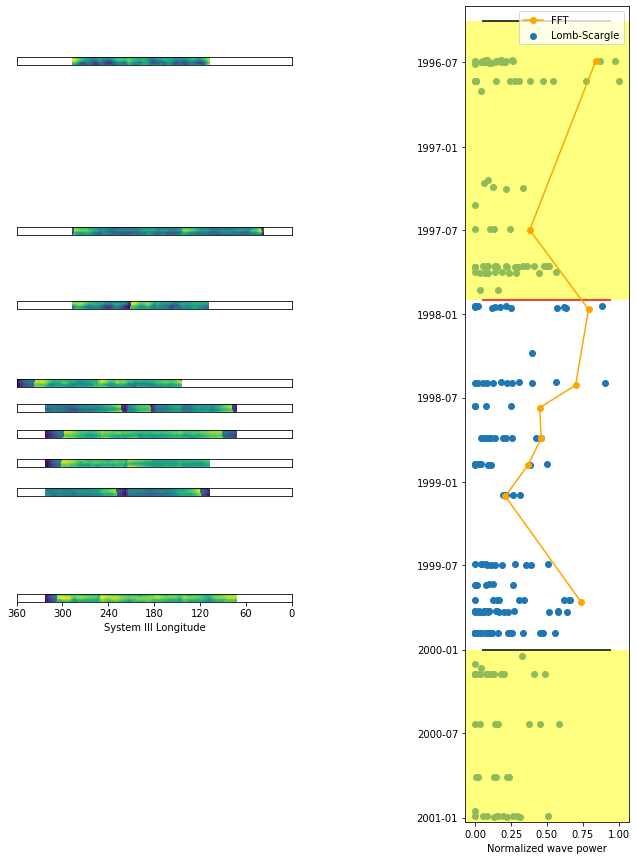

In [686]:
drop = []
invert = [0, 1, 2, 3, 6, 8]
fig = plt.figure(figsize=(17, 15))
ylocs = [487, 520, 555, 590, 457, 270, 720, 361, 62]
graphdf = obs2.head(9)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 6:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1996-06-28', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-12-21', '%Y-%m-%d'),
 datetime.strptime('1998-06-04', '%Y-%m-%d'),
 datetime.strptime('1998-07-23', '%Y-%m-%d'),
 datetime.strptime('1998-09-27', '%Y-%m-%d'),
 datetime.strptime('1998-11-24', '%Y-%m-%d'),
 datetime.strptime('1999-02-01', '%Y-%m-%d'),
 datetime.strptime('1999-09-20', '%Y-%m-%d')]
wavepowers.plot([.84,.38, .79, .7, .45, .46, .37, .21, .74], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.0_98-00.png', bbox_inches='tight')

In [218]:
obs230 = pd.DataFrame()
dates = []
filenames = []
lonstarts = []
lonends = []
fftpeaks = []
for i, row in dfsorted[dfsorted['wavelength'] == '2.3'].iterrows():
    dates.append(datetime.strptime(row['date'], '%y-%b-%d'))
    filenames.append(row['date']+'_'+row['wavelength'] + '.png.png')
    lonstarts.append(int(row['lonstart']))
    lonends.append(int(row['lonend']))
    fftpeaks.append(row['peakFftPower'])
obs230['filename'] = filenames
obs230['date'] = dates
obs230['lonstart'] = lonstarts
obs230['lonend'] = lonends
obs230['fftpeak'] = fftpeaks
obs230 = obs230.sort_values(by='date')
obs230

,filename,date,lonstart,lonend,fftpeak
14,97-apr-2_2.3.png.png,1997-04-02,72,648,0.025933
15,97-apr-26_2.3.png.png,1997-04-26,72,648,0.030816
16,97-may-7_2.3.png.png,1997-05-07,72,648,0.028691
19,98-sep-26_2.3.png.png,1998-09-26,72,576,0.014074
18,98-oct-5_2.3.png.png,1998-10-05,0,648,0.015628
17,98-dec-12_2.3.png.png,1998-12-12,216,720,0.023146
21,99-jan-28_2.3.png.png,1999-01-28,0,648,0.031612
24,99-jun-29_2.3.png.png,1999-06-29,72,720,0.007540
22,99-jul-2_2.3.png.png,1999-07-02,216,720,0.018029
23,99-jul-26_2.3.png.png,1999-07-26,144,648,0.049687


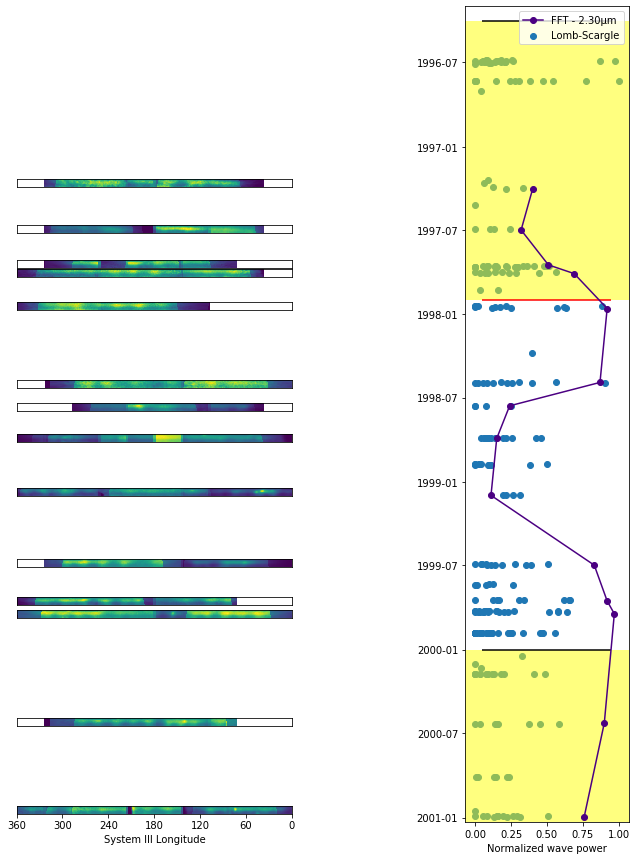

In [222]:
drop = [1, 7, 8, 12, 13, 14, 15, 19]
invert = [5, 6, 8, 17, 21]
fig = plt.figure(figsize=(17, 15))
ylocs = [212, 268, 311, 322, 362, 458, 486, 524, 591, 677, 724, 740, 873, 980]
graphdf = obs230.head(22)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 13:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1997-04-03', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-09-15', '%Y-%m-%d'),
 datetime.strptime('1997-10-04', '%Y-%m-%d'),
 datetime.strptime('1997-12-19', '%Y-%m-%d'),
 datetime.strptime('1998-05-29', '%Y-%m-%d'),
 datetime.strptime('1998-07-19', '%Y-%m-%d'),
 datetime.strptime('1998-09-28', '%Y-%m-%d'),
 datetime.strptime('1999-01-30', '%Y-%m-%d'),
 datetime.strptime('1999-07-01', '%Y-%m-%d'),
 datetime.strptime('1999-09-17', '%Y-%m-%d'),
 datetime.strptime('1999-10-15', '%Y-%m-%d'),
 datetime.strptime('2000-06-09', '%Y-%m-%d'),
 datetime.strptime('2000-12-30', '%Y-%m-%d')]
wavepowers.plot([.4,.32,.51, .69, .92, .87, .24, .15, .11, .83, .92, .97, .9, .76], fftdates, color='indigo', marker='o', label='FFT - 2.30μm')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.30_97-00.png', bbox_inches='tight')

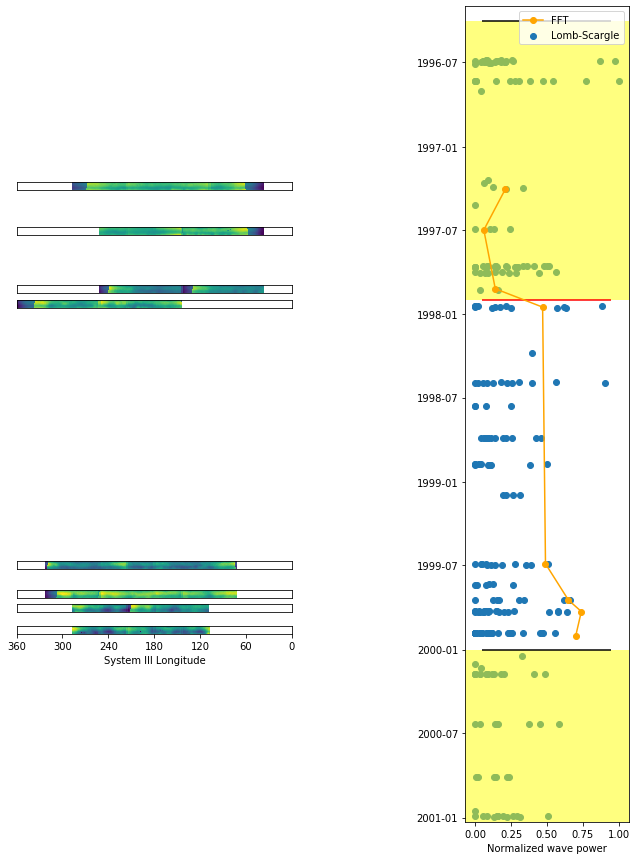

In [799]:
drop = [0]
invert = [5, 6, 8, 17, 21]
fig = plt.figure(figsize=(17, 15))
ylocs = [215, 270, 342, 360, 680, 715, 733, 760]
graphdf = obs203.head(9)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 7:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1997-04-03', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-11-06', '%Y-%m-%d'),
 datetime.strptime('1997-12-16', '%Y-%m-%d'),
 datetime.strptime('1999-06-28', '%Y-%m-%d'),
 datetime.strptime('1999-09-15', '%Y-%m-%d'),
 datetime.strptime('1999-10-10', '%Y-%m-%d'),
 datetime.strptime('1999-12-03', '%Y-%m-%d')]
wavepowers.plot([.21,.06,.14, .47, .49, .65, .74, .7], fftdates, color='orange', marker='o', label='FFT')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.03_97-99.png', bbox_inches='tight')

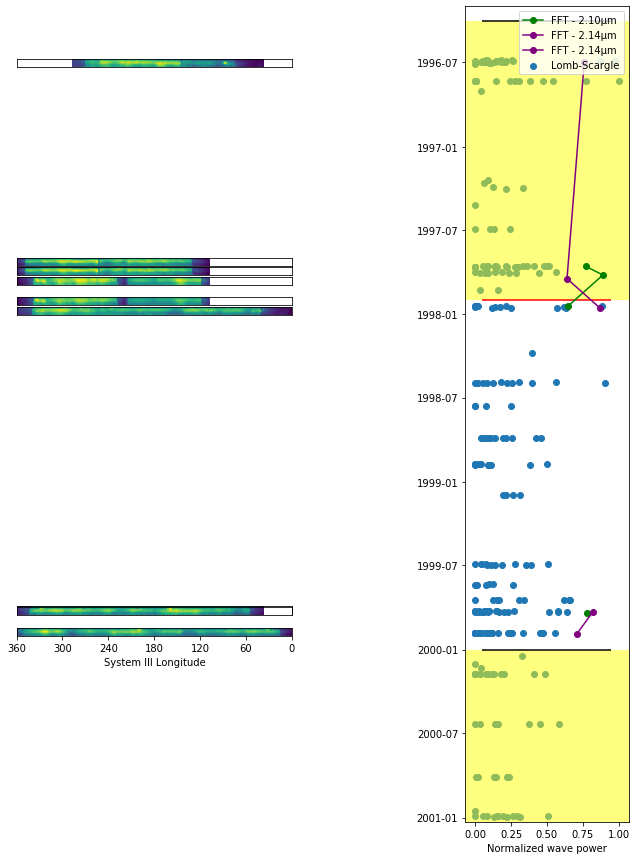

In [402]:
#summary plots for 1996-2000, 2.10 & 2.14um
drop = []
invert = [1, 2, 4]
fig = plt.figure(figsize=(17, 15))
ylocs = [65, 320, 356, 735, 762]
graphdf = obs214
df = pd.read_csv('../datafiles/foldeddata.csv')
df = df[(df.absdate > '1996') & (df.absdate < '2001')]
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 4:
            plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1
    
drop = []
invert = [0, 1]
ylocs = [308, 332, 368, 736]
graphdf = obs21
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
#         if g == 3:
#             plt.xticks(np.arange(721, 0, -720/6), np.arange(360, -1, -60))
#             plt.xlabel("System III Longitude")
        g += 1
    c += 1


wavepowers = fig.add_subplot(grid[:, -1:])

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1997-09-18', '%Y-%m-%d'),
 datetime.strptime('1997-10-07', '%Y-%m-%d'),
 datetime.strptime('1997-12-13', '%Y-%m-%d')]
wavepowers.plot([.77,.89, .65], fftdates, color='green', marker='o', label='FFT - 2.10μm')
fftdates= [datetime.strptime('1999-10-14', '%Y-%m-%d')]
wavepowers.plot([.78], fftdates, color='green', marker='o')

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

fftdates = [datetime.strptime('1996-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-10-15', '%Y-%m-%d'),
 datetime.strptime('1997-12-18', '%Y-%m-%d')]
wavepowers.plot([.76,.64, .87], fftdates, color='purple', marker='o', label='FFT - 2.14μm')
fftdates= [datetime.strptime('1999-10-11', '%Y-%m-%d'),
 datetime.strptime('1999-11-27', '%Y-%m-%d')]
wavepowers.plot([.82, .71], fftdates, color='purple', marker='o', label='FFT - 2.14μm')
wavepowers.hlines(startdates[:3], xmin=0.05, xmax=0.95)
wavepowers.hlines(enddates[0], xmin=0.05, xmax=0.95, color='red')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.10_2.14_96-00.png')

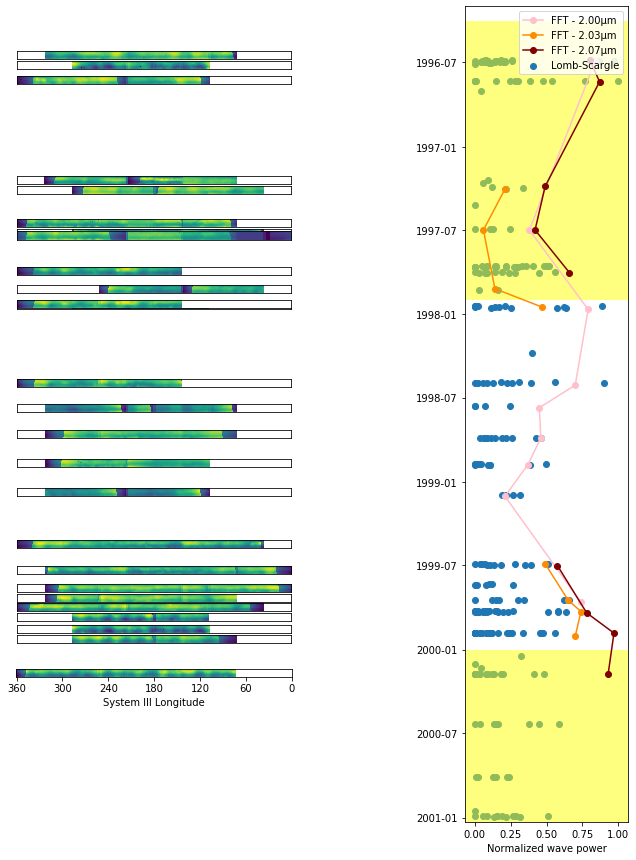

In [401]:
drop = []
invert = [0, 1, 2, 3, 6, 8]
fig = plt.figure(figsize=(17, 15))
ylocs = [487, 520, 555, 590, 457, 273, 720, 361, 67]
graphdf = obs2.head(9)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        g += 1
    c += 1

drop = [0]
invert = [5, 6, 8, 17, 21]
ylocs = [220, 261, 342, 360, 686, 708, 744, 759]
graphdf = obs203.head(9)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        g += 1
    c += 1

drop = []
invert = [1, 3]
ylocs = [208, 55, 276, 85, 320, 654, 732, 771, 812]
graphdf = obs207.head(9)
grid = plt.GridSpec(1000, 5)
c = 0
g = 0
for i, row in graphdf.iterrows():
    if c not in drop:
        img = plt.imread('../imgs/stitch/'+row['filename'])
        neb = np.full((img.shape[0], 720, 4), 1.) 
        neb[:, row['lonstart']:row['lonend'], :] = img
        currday = int(datetime.timestamp(row['date'])) // 86400
        yloc = ylocs[g]
        ax = fig.add_subplot(grid[yloc:yloc+10, 1:-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(neb, cmap='gist_heat')
        if c in invert:
            plt.gca().invert_xaxis()
        if g == 8:
            plt.xticks(np.arange(0, 721, 720/6), np.arange(360, -1, -60))
            plt.xlabel("System III Longitude")
        g += 1
    c += 1

    
wavepowers = fig.add_subplot(grid[:, -1:])

plt.ylim(datetime.strptime('1996-03-01', '%Y-%m-%d'), datetime.strptime('2001-01-10', '%Y-%m-%d'))
plt.axhspan(startdates[0], enddates[0], facecolor='yellow', alpha=0.5)
plt.axhspan(startdates[1], enddates[1], facecolor='yellow', alpha=0.5)

wavepowers.scatter(np.array(df['power'])/np.max(df['power']), [datetime.strptime(s, '%Y-%m-%d') for s in df['absdate'].tolist()], label='Lomb-Scargle')
fftdates = [datetime.strptime('1996-06-28', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-12-21', '%Y-%m-%d'),
 datetime.strptime('1998-06-04', '%Y-%m-%d'),
 datetime.strptime('1998-07-23', '%Y-%m-%d'),
 datetime.strptime('1998-09-27', '%Y-%m-%d'),
 datetime.strptime('1998-11-24', '%Y-%m-%d'),
 datetime.strptime('1999-02-01', '%Y-%m-%d'),
 datetime.strptime('1999-09-20', '%Y-%m-%d')]
wavepowers.plot([.84,.38, .79, .7, .45, .46, .37, .21, .74], fftdates, color='pink', marker='o', label='FFT - 2.00μm')

fftdates = [datetime.strptime('1997-04-03', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-11-06', '%Y-%m-%d'),
 datetime.strptime('1997-12-16', '%Y-%m-%d')]
wavepowers.plot([.21,.06,.14, .47], fftdates, color='darkorange', marker='o', label='FFT - 2.03μm')
fftdates= [datetime.strptime('1999-06-28', '%Y-%m-%d'),
 datetime.strptime('1999-09-15', '%Y-%m-%d'),
 datetime.strptime('1999-10-10', '%Y-%m-%d'),
 datetime.strptime('1999-12-03', '%Y-%m-%d')]
wavepowers.plot([.49, .65, .74, .7], fftdates, color='darkorange', marker='o')

fftdates = [datetime.strptime('1996-06-25', '%Y-%m-%d'),
 datetime.strptime('1996-08-12', '%Y-%m-%d'),
 datetime.strptime('1997-03-28', '%Y-%m-%d'),
 datetime.strptime('1997-07-01', '%Y-%m-%d'),
 datetime.strptime('1997-10-02', '%Y-%m-%d')]
wavepowers.plot([.8,.87, .49, .42, .66], fftdates, color='maroon', marker='o', label='FFT - 2.07μm')
fftdates = [datetime.strptime('1999-07-02', '%Y-%m-%d'),
 datetime.strptime('1999-10-13', '%Y-%m-%d'),
 datetime.strptime('1999-11-26', '%Y-%m-%d'),
 datetime.strptime('2000-02-22', '%Y-%m-%d')]
wavepowers.plot([.576, .78, .97, .93], fftdates, color='maroon', marker='o')

plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.xlabel("Normalized wave power")
plt.savefig('graphs/progression/2.00_2.03_2.07_96-00.png', bbox_inches='tight')